In [1]:
#!pip3 install albumentations

In [2]:
# Initialized Logger
import torch
import torch.optim as optim
from torchvision import datasets
import albumentations as A
from torchsummary import summary
from src.model import Net
from src.utils import get_device, \
                  fit_model, plot_accuracy_report, \
                  show_random_results, plot_misclassified, \
                  calculate_accuracy_per_class
from src.dataset import dataset_stats,\
                        visualize_images,\
                        visualize_augmentated_images,\
                        AlbumentationImageDataset

CODE BLOCK: 2

In [3]:
# CUDA?
device = get_device()
print("Available Device :: ", device)

INFO:src.utils:device: cuda


Available Device ::  cuda


CODE BLOCK: 3

In [4]:
sample = datasets.CIFAR10('./data',train=True,download=True)
sample_data = sample.data

mean,std,var = dataset_stats(sample_data)
print(f"SHAPE of Images {sample_data.shape}")
print(f"MEAN of dataset {mean}")
print(f"STD of dataset {std}")
print(f"VAR of dataset {var}")

Files already downloaded and verified
SHAPE of Images (50000, 32, 32, 3)
MEAN of dataset [0.49139968 0.48215841 0.44653091]
STD of dataset [0.24703223 0.24348513 0.26158784]
VAR of dataset [15.56135559 15.11767693 17.44919073]


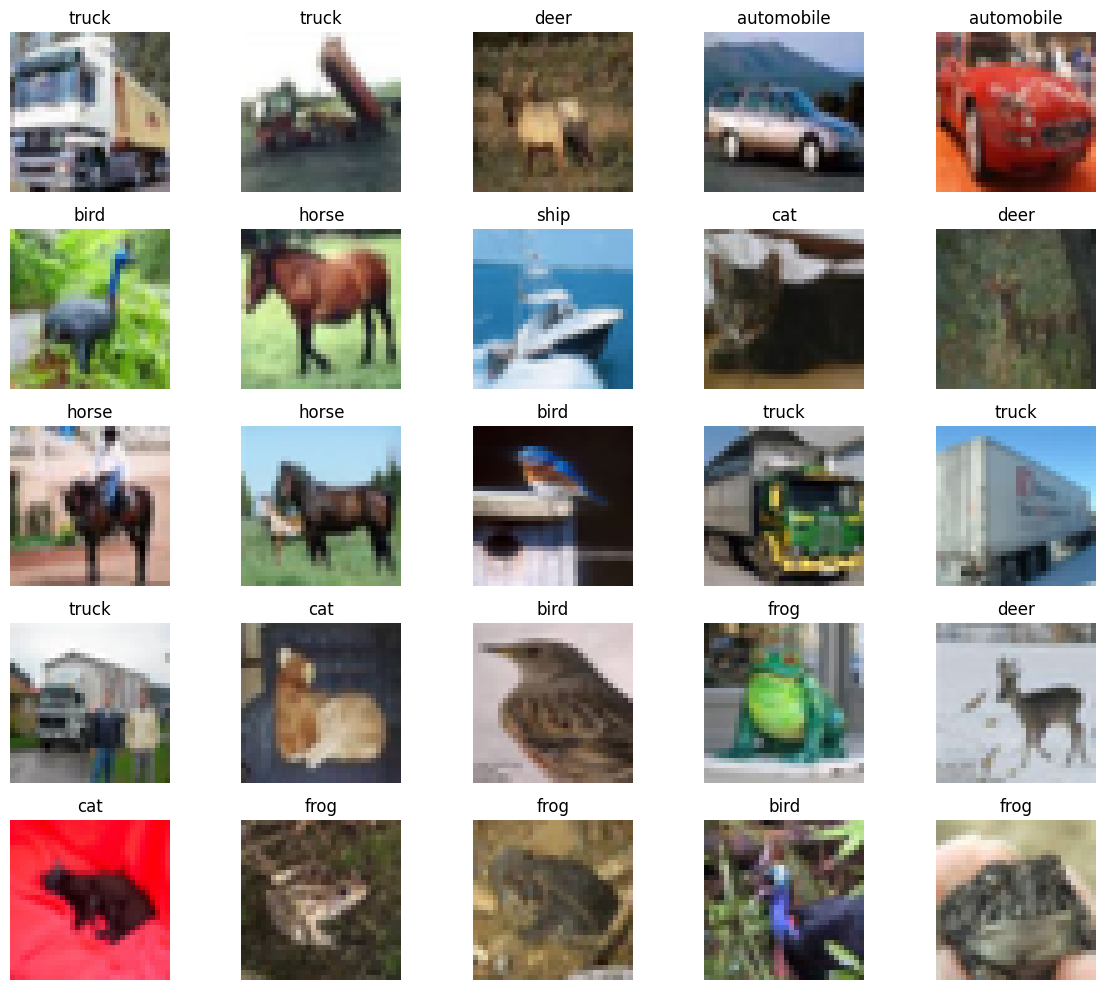

In [5]:
visualize_images(sample,(5,5))

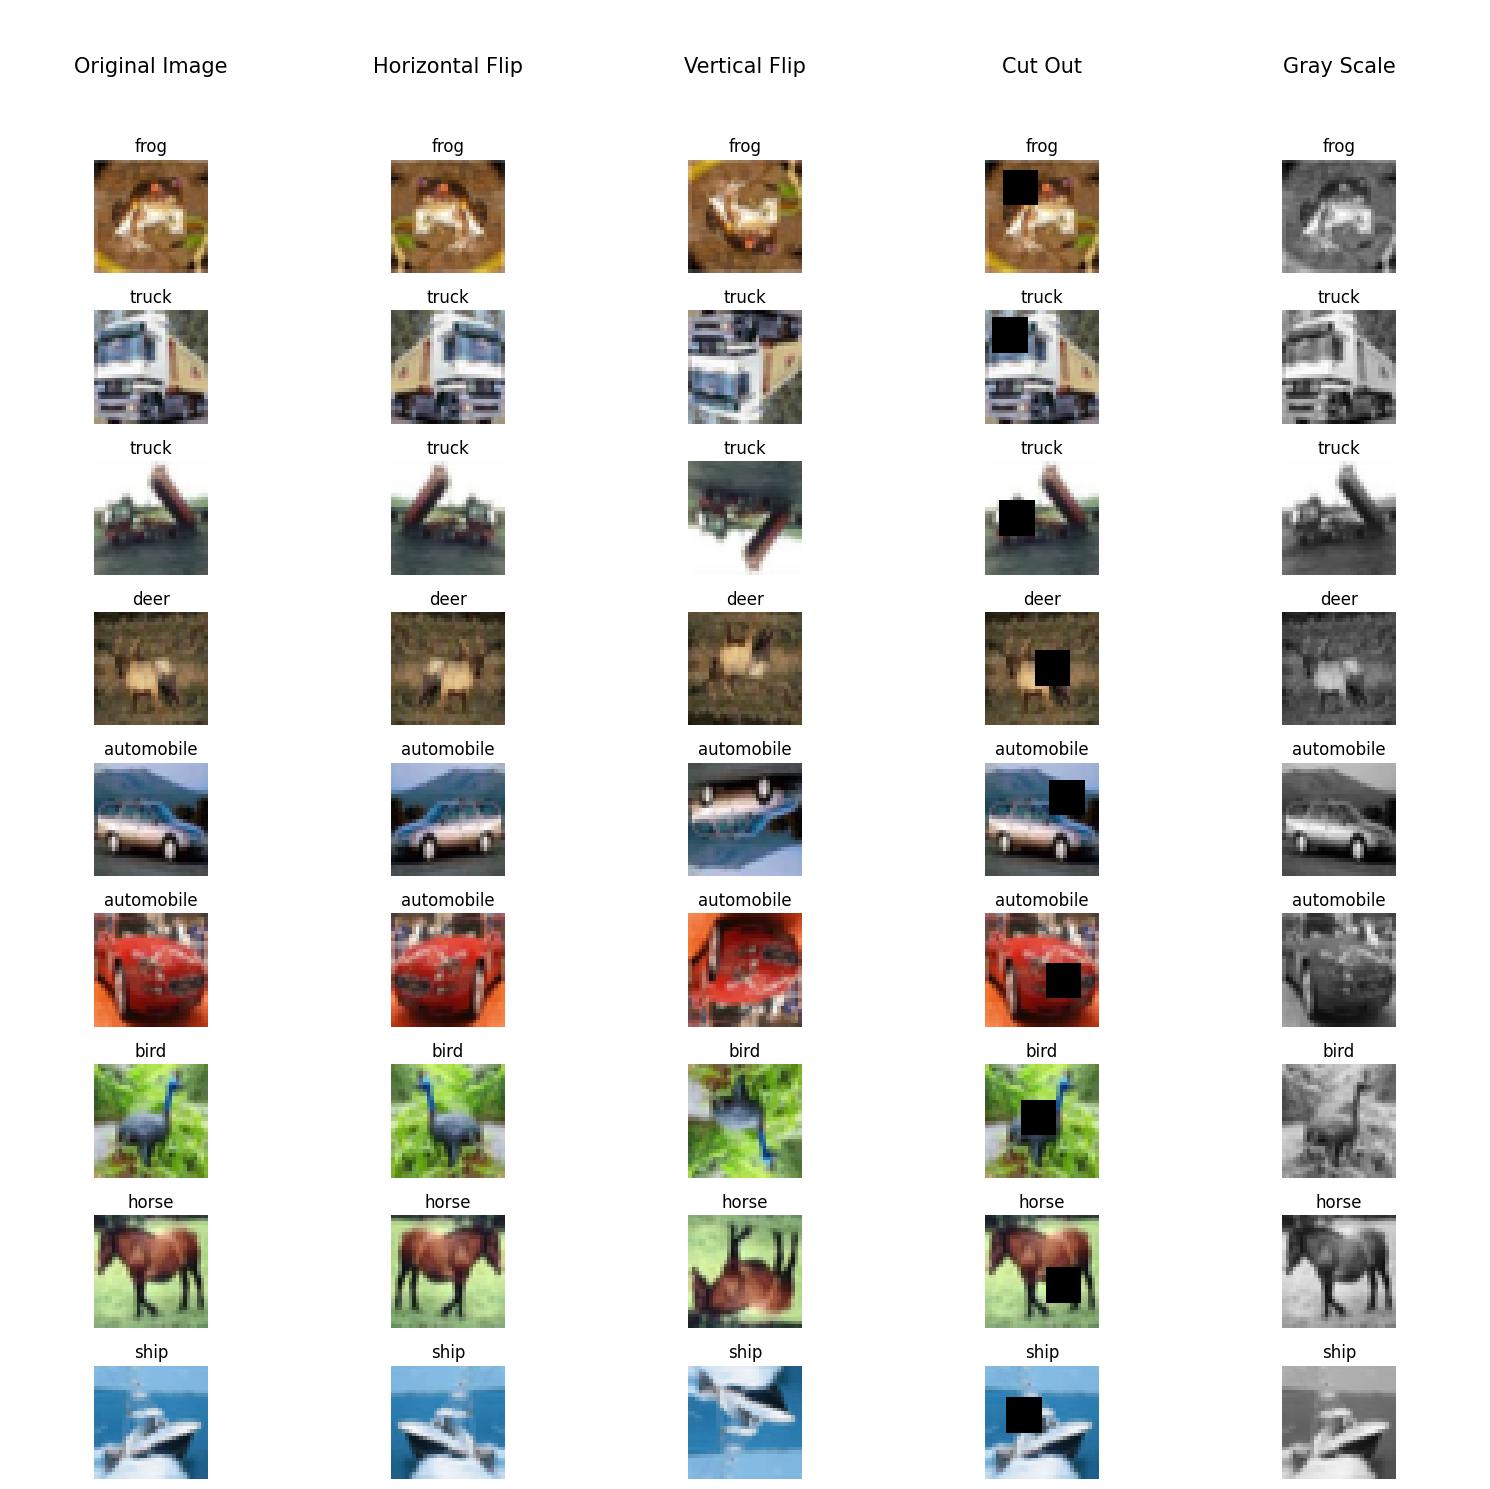

In [6]:
aug_details = {
    'Original Image': None,
    'Horizontal Flip': A.HorizontalFlip(always_apply=True),
    'Vertical Flip': A.VerticalFlip(always_apply=True),
    'Cut Out': A.CoarseDropout(max_holes=1, max_height=10, max_width=10, min_holes=1, min_height=10,
                               min_width=10, fill_value=0.473363, mask_fill_value=None, always_apply=True),
    'Gray Scale': A.ToGray(always_apply=True)
}

visualize_augmentated_images(sample,aug_details)

In [7]:
train_data = datasets.CIFAR10(root='./data', train=True,
                                        download=True )
test_data = datasets.CIFAR10(root='./data', train=False,
                                       download=True)


train_loader = torch.utils.data.DataLoader(AlbumentationImageDataset(train_data,(0.49139968, 0.48215841, 0.44653091),(0.24703223, 0.24348513, 0.26158784),train=True), batch_size=128,
                                          shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(AlbumentationImageDataset(test_data,(0.49139968, 0.48215841, 0.44653091),(0.24703223, 0.24348513, 0.26158784),train=False), batch_size=128,
                                          shuffle=False, num_workers=1)

Files already downloaded and verified
Files already downloaded and verified


In [8]:
model = Net(norm_type="bn").to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 32, 32]             270
              ReLU-2           [-1, 10, 32, 32]               0
       BatchNorm2d-3           [-1, 10, 32, 32]              20
           Dropout-4           [-1, 10, 32, 32]               0
            Conv2d-5           [-1, 20, 32, 32]           1,800
              ReLU-6           [-1, 20, 32, 32]               0
       BatchNorm2d-7           [-1, 20, 32, 32]              40
           Dropout-8           [-1, 20, 32, 32]               0
            Conv2d-9           [-1, 10, 34, 34]             200
             ReLU-10           [-1, 10, 34, 34]               0
      BatchNorm2d-11           [-1, 10, 34, 34]              20
          Dropout-12           [-1, 10, 34, 34]               0
        MaxPool2d-13           [-1, 10, 17, 17]               0
           Conv2d-14           [-1, 20,

In [9]:
training_parameters = {"learning_rate":0.01,
                       "momentum":0.7,
                       "step_size":3,
                       "gamma":0.2,
                       "max_lr":0.015,
                       "num_epochs":20
                       }
train_losses, test_losses, train_acc, test_acc = fit_model(model,training_parameters,train_loader,test_loader,device)

Adjusting learning rate of group 0 to 6.0000e-04.
Epoch 1


Train: Loss=1.8013 Batch_id=390 Accuracy=25.06: 100%|██████████| 391/391 [00:18<00:00, 21.70it/s]


Test set: Average loss: 1.7041, Accuracy: 3877/10000 (38.77%)

Adjusting learning rate of group 0 to 6.0001e-04.
Epoch 2


Train: Loss=1.6449 Batch_id=390 Accuracy=36.68: 100%|██████████| 391/391 [00:17<00:00, 21.98it/s]


Test set: Average loss: 1.4724, Accuracy: 4696/10000 (46.96%)

Adjusting learning rate of group 0 to 6.0003e-04.
Epoch 3


Train: Loss=1.6387 Batch_id=390 Accuracy=41.85: 100%|██████████| 391/391 [00:19<00:00, 19.95it/s]


Test set: Average loss: 1.3547, Accuracy: 5159/10000 (51.59%)

Adjusting learning rate of group 0 to 6.0006e-04.
Epoch 4


Train: Loss=1.5440 Batch_id=390 Accuracy=45.53: 100%|██████████| 391/391 [00:18<00:00, 21.18it/s]


Test set: Average loss: 1.2922, Accuracy: 5354/10000 (53.54%)

Adjusting learning rate of group 0 to 6.0010e-04.
Epoch 5


Train: Loss=1.3447 Batch_id=390 Accuracy=47.72: 100%|██████████| 391/391 [00:18<00:00, 20.80it/s]


Test set: Average loss: 1.1929, Accuracy: 5736/10000 (57.36%)

Adjusting learning rate of group 0 to 6.0016e-04.
Epoch 6


Train: Loss=1.6484 Batch_id=390 Accuracy=49.32: 100%|██████████| 391/391 [00:19<00:00, 19.98it/s]


Test set: Average loss: 1.1460, Accuracy: 5937/10000 (59.37%)

Adjusting learning rate of group 0 to 6.0023e-04.
Epoch 7


Train: Loss=1.5270 Batch_id=390 Accuracy=51.46: 100%|██████████| 391/391 [00:18<00:00, 20.81it/s]


Test set: Average loss: 1.0987, Accuracy: 6097/10000 (60.97%)

Adjusting learning rate of group 0 to 6.0032e-04.
Epoch 8


Train: Loss=1.2787 Batch_id=390 Accuracy=52.67: 100%|██████████| 391/391 [00:18<00:00, 21.27it/s]


Test set: Average loss: 1.0686, Accuracy: 6197/10000 (61.97%)

Adjusting learning rate of group 0 to 6.0041e-04.
Epoch 9


Train: Loss=1.4946 Batch_id=390 Accuracy=53.56: 100%|██████████| 391/391 [00:19<00:00, 20.12it/s]


Test set: Average loss: 1.0325, Accuracy: 6301/10000 (63.01%)

Adjusting learning rate of group 0 to 6.0052e-04.
Epoch 10


Train: Loss=1.2850 Batch_id=390 Accuracy=54.57: 100%|██████████| 391/391 [00:18<00:00, 21.42it/s]


Test set: Average loss: 0.9819, Accuracy: 6510/10000 (65.10%)

Adjusting learning rate of group 0 to 6.0065e-04.
Epoch 11


Train: Loss=1.2321 Batch_id=390 Accuracy=55.30: 100%|██████████| 391/391 [00:18<00:00, 21.42it/s]


Test set: Average loss: 0.9718, Accuracy: 6583/10000 (65.83%)

Adjusting learning rate of group 0 to 6.0078e-04.
Epoch 12


Train: Loss=1.3096 Batch_id=390 Accuracy=55.93: 100%|██████████| 391/391 [00:19<00:00, 20.29it/s]


Test set: Average loss: 0.9583, Accuracy: 6555/10000 (65.55%)

Adjusting learning rate of group 0 to 6.0093e-04.
Epoch 13


Train: Loss=1.2474 Batch_id=390 Accuracy=56.92: 100%|██████████| 391/391 [00:18<00:00, 21.58it/s]


Test set: Average loss: 0.9408, Accuracy: 6699/10000 (66.99%)

Adjusting learning rate of group 0 to 6.0109e-04.
Epoch 14


Train: Loss=0.9556 Batch_id=390 Accuracy=57.27: 100%|██████████| 391/391 [00:18<00:00, 21.61it/s]


Test set: Average loss: 0.9422, Accuracy: 6653/10000 (66.53%)

Adjusting learning rate of group 0 to 6.0127e-04.
Epoch 15


Train: Loss=1.0150 Batch_id=390 Accuracy=58.02: 100%|██████████| 391/391 [00:19<00:00, 19.99it/s]


Test set: Average loss: 0.8914, Accuracy: 6864/10000 (68.64%)

Adjusting learning rate of group 0 to 6.0145e-04.
Epoch 16


Train: Loss=1.1358 Batch_id=390 Accuracy=58.85: 100%|██████████| 391/391 [00:18<00:00, 21.18it/s]


Test set: Average loss: 0.8953, Accuracy: 6867/10000 (68.67%)

Adjusting learning rate of group 0 to 6.0165e-04.
Epoch 17


Train: Loss=0.9937 Batch_id=390 Accuracy=59.13: 100%|██████████| 391/391 [00:18<00:00, 20.98it/s]


Test set: Average loss: 0.8589, Accuracy: 6973/10000 (69.73%)

Adjusting learning rate of group 0 to 6.0187e-04.
Epoch 18


Train: Loss=1.0409 Batch_id=390 Accuracy=59.53: 100%|██████████| 391/391 [00:19<00:00, 20.06it/s]


Test set: Average loss: 0.8508, Accuracy: 7037/10000 (70.37%)

Adjusting learning rate of group 0 to 6.0209e-04.
Epoch 19


Train: Loss=1.1001 Batch_id=390 Accuracy=60.12: 100%|██████████| 391/391 [00:18<00:00, 21.14it/s]


Test set: Average loss: 0.8409, Accuracy: 7079/10000 (70.79%)

Adjusting learning rate of group 0 to 6.0233e-04.
Epoch 20


Train: Loss=1.1158 Batch_id=390 Accuracy=60.48: 100%|██████████| 391/391 [00:18<00:00, 21.02it/s]


Test set: Average loss: 0.8338, Accuracy: 7136/10000 (71.36%)

Adjusting learning rate of group 0 to 6.0258e-04.


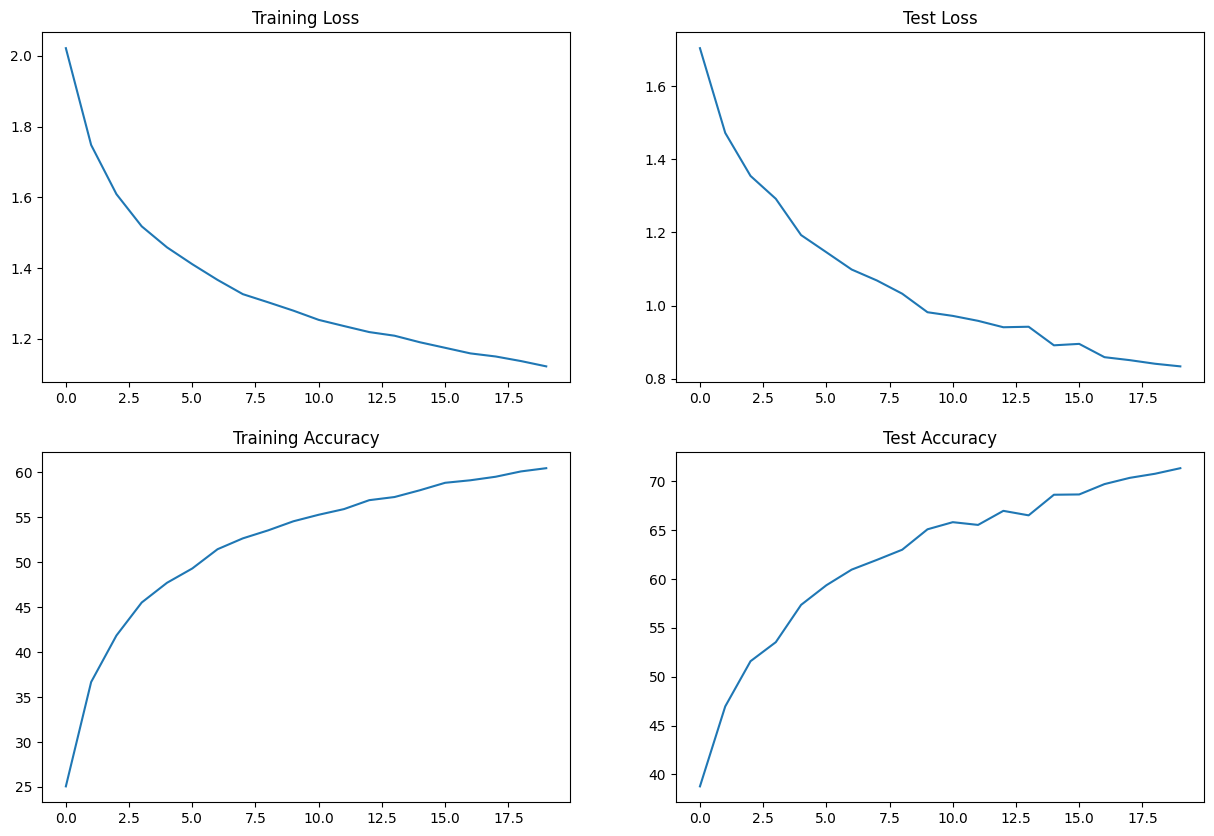

In [10]:
plot_accuracy_report(train_losses, test_losses, train_acc, test_acc)

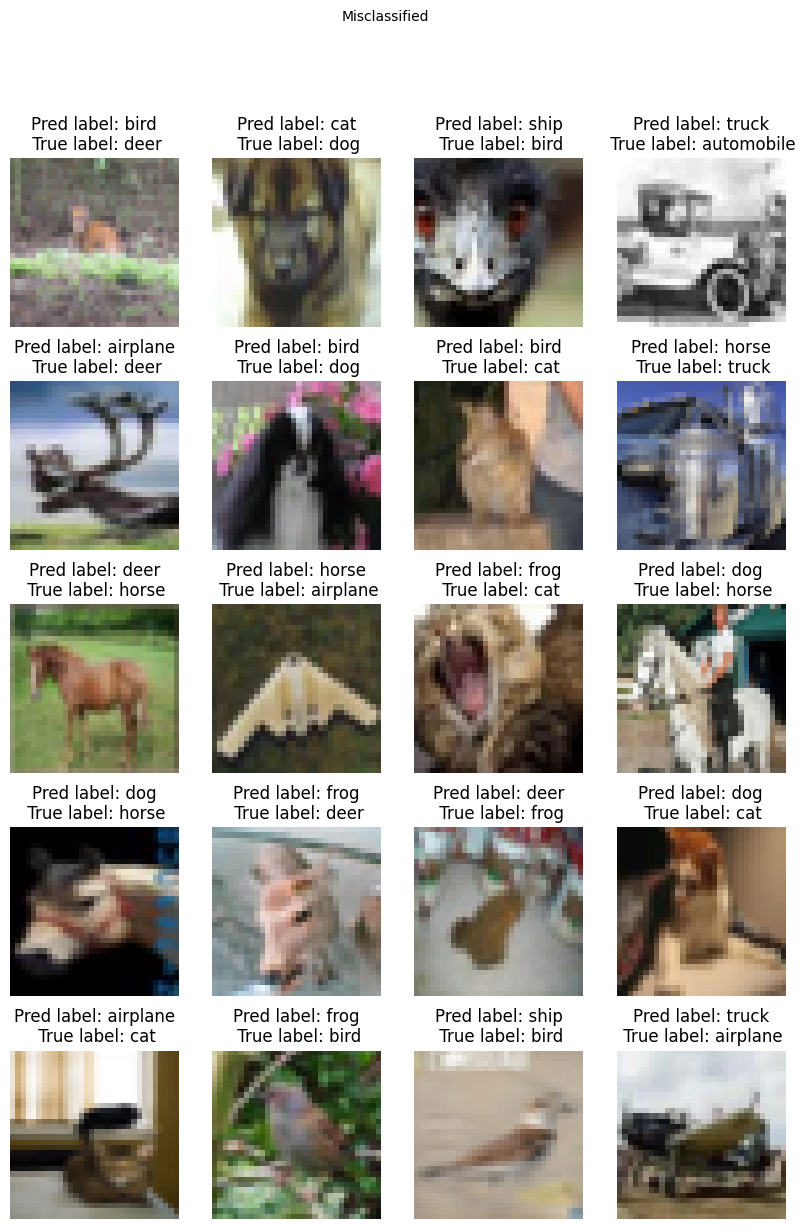

In [11]:
# from torchvision import transforms
# import matplotlib.pyplot as plt
# import numpy as np

grid_size = (4,4)
plot_misclassified(model,test_loader,test_data,device,mean,std)


Accuracy of airplane : 73 %

Accuracy of automobile : 87 %

Accuracy of  bird : 55 %

Accuracy of   cat : 41 %

Accuracy of  deer : 63 %

Accuracy of   dog : 53 %

Accuracy of  frog : 84 %

Accuracy of horse : 79 %

Accuracy of  ship : 80 %

Accuracy of truck : 86 %
{'airplane': 73.61111111111111, 'automobile': 87.17948717948718, 'bird': 55.172413793103445, 'cat': 41.25, 'deer': 63.888888888888886, 'dog': 53.42465753424658, 'frog': 84.26966292134831, 'horse': 79.48717948717949, 'ship': 80.23255813953489, 'truck': 86.66666666666667}


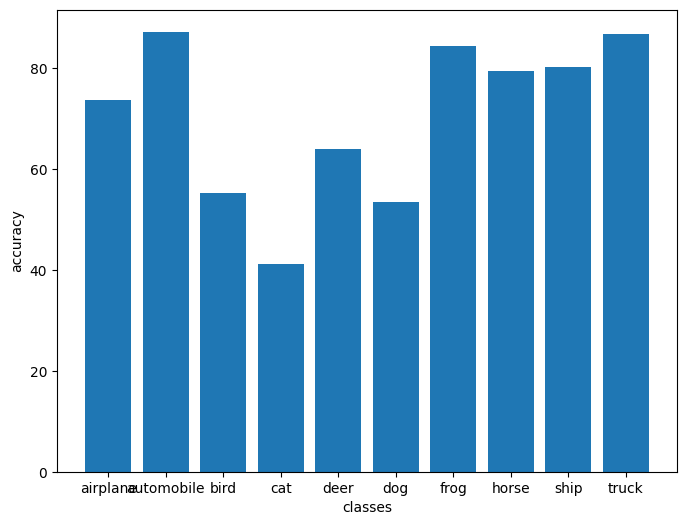

In [12]:
calculate_accuracy_per_class(model,device,test_loader,test_data)